# **Uncovering Latent Topics: An Unsupervised Approach to Newsgroup Classification**

# Project Overview

## Dataset Description
The dataset used in this project is the **20 Newsgroups** dataset, a collection of nearly 20,000 documents collected from 20 different newsgroups. Each document is labeled with its corresponding newsgroup category. This dataset is widely used in natural language processing (NLP) research for text classification and clustering tasks. The data was originally obtained from [http://qwone.com/~jason/20Newsgroups/](http://qwone.com/~jason/20Newsgroups/) and is conveniently accessible through scikit‑learn’s `fetch_20newsgroups` function. In this project, the dataset has been pre-downloaded and extracted to be used directly.

## Problem Objective
The objective of this project is to apply unsupervised learning techniques to discover latent topics within the news articles and ultimately classify the documents based on these topics. Although the dataset includes labels, the focus is on using matrix factorization—specifically **Non-negative Matrix Factorization (NMF)**—to reduce the high-dimensional TF‑IDF representations of the articles into a lower-dimensional latent space. A classifier will then be trained on these latent features to predict the newsgroup categories. The performance of this unsupervised approach will be compared with a supervised model built directly on the TF‑IDF features, providing insights into the strengths and limitations of unsupervised methods when labeled data is available.

## Deliverables
1. **Jupyter Notebook Report:** This notebook details the problem description, exploratory data analysis (EDA), model building, training, evaluation, and final conclusions.
2. **Video Presentation:** A short video (5–15 minutes) summarizing the problem, the ML approach, and key results.
3. **GitHub Repository:** A public repository containing all project code, documentation, and supplementary materials (e.g., a project report or slides).

In the following sections, we will conduct a thorough EDA, preprocess the text data, extract features using TF‑IDF, apply NMF for unsupervised topic modeling, and compare its performance with a supervised approach.


In [4]:
!tar -xvzf 20news-19997.tar.gz

Streaming output truncated to the last 5000 lines.
20_newsgroups/soc.religion.christian/20607
20_newsgroups/soc.religion.christian/20608
20_newsgroups/soc.religion.christian/20609
20_newsgroups/soc.religion.christian/20579
20_newsgroups/soc.religion.christian/20580
20_newsgroups/soc.religion.christian/20581
20_newsgroups/soc.religion.christian/20582
20_newsgroups/soc.religion.christian/20583
20_newsgroups/soc.religion.christian/20584
20_newsgroups/soc.religion.christian/20585
20_newsgroups/soc.religion.christian/20586
20_newsgroups/soc.religion.christian/20587
20_newsgroups/soc.religion.christian/20588
20_newsgroups/soc.religion.christian/20589
20_newsgroups/soc.religion.christian/20590
20_newsgroups/soc.religion.christian/20591
20_newsgroups/soc.religion.christian/20592
20_newsgroups/soc.religion.christian/20593
20_newsgroups/soc.religion.christian/20594
20_newsgroups/soc.religion.christian/20595
20_newsgroups/soc.religion.christian/20596
20_newsgroups/soc.religion.christian/20597
20_

In [5]:
from sklearn.datasets import load_files

# Assuming the folder '20_newsgroups' was extracted to the current directory
data_dir = "20_newsgroups"
newsgroups_data = load_files(data_dir, encoding='latin1', shuffle=True, random_state=42)

print("Number of documents:", len(newsgroups_data.data))
print("Categories:", newsgroups_data.target_names)

Number of documents: 19997
Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


**Convert Data to DataFrame and Basic EDA**

Data shape: (19997, 3)
                                                text  category  \
0  Newsgroups: rec.sport.hockey\nPath: cantaloupe...        10   
1  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.next....         4   
2  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....         3   
3  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....         3   
4  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....        17   

              category_name  
0          rec.sport.hockey  
1     comp.sys.mac.hardware  
2  comp.sys.ibm.pc.hardware  
3  comp.sys.ibm.pc.hardware  
4     talk.politics.mideast  


<ipython-input-6-40cc62e1fc59>:20: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sns.countplot(x='category_name', data=df, order=pd.value_counts(df['category_name']).index, palette='viridis')
<ipython-input-6-40cc62e1fc59>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_name', data=df, order=pd.value_counts(df['category_name']).index, palette='viridis')


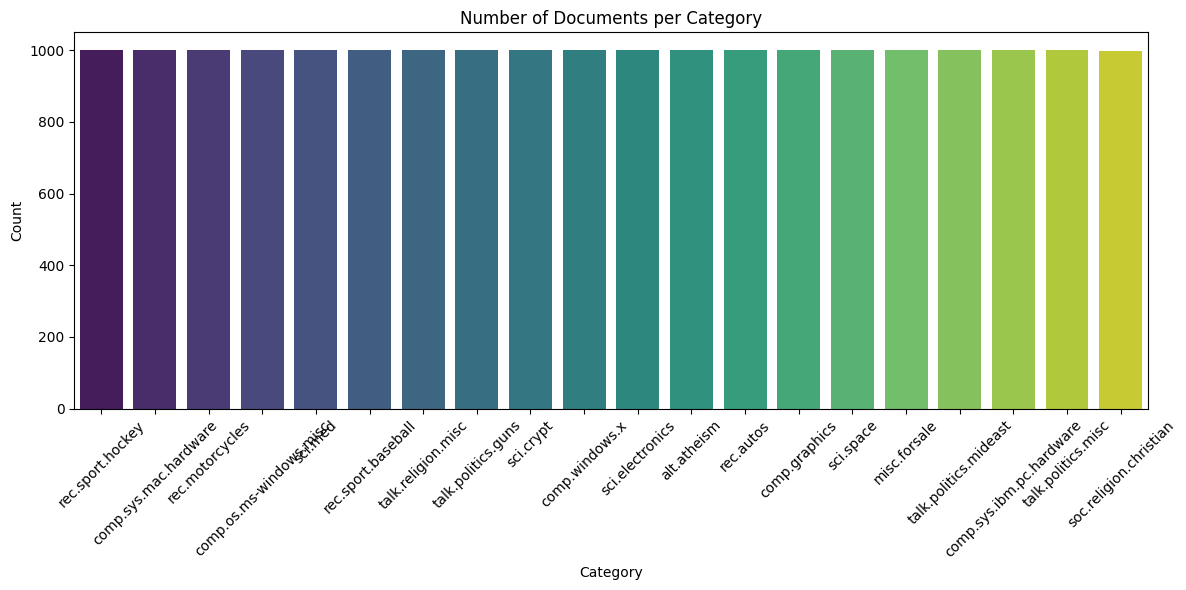

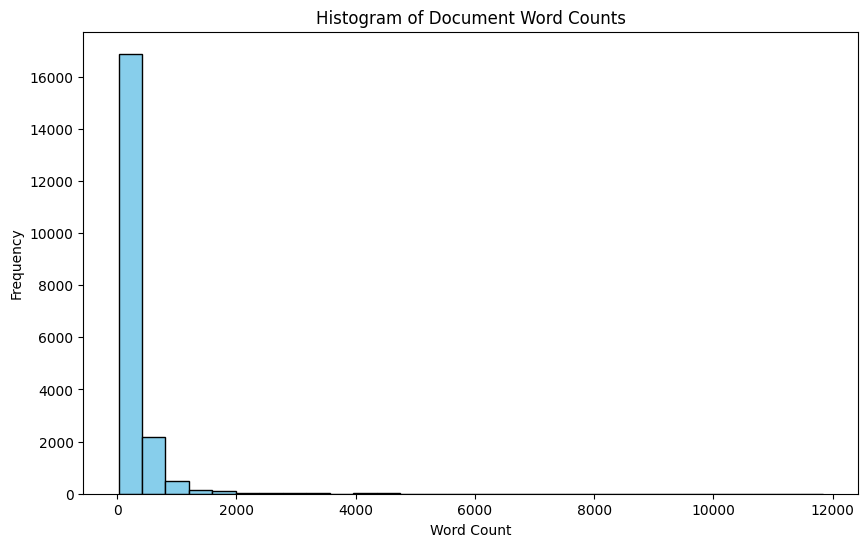

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create DataFrame from loaded data
df = pd.DataFrame({
    'text': newsgroups_data.data,
    'category': newsgroups_data.target
})
# Map numeric category to category names for readability
target_names = newsgroups_data.target_names
df['category_name'] = df['category'].apply(lambda x: target_names[x])

print("Data shape:", df.shape)
print(df.head())

# Visualize distribution of documents per category
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, order=pd.value_counts(df['category_name']).index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Number of Documents per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Compute document length (word count) and visualize distribution
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Document Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


Data shape: (19997, 3)
                                                text  category  \
0  Newsgroups: rec.sport.hockey\nPath: cantaloupe...        10   
1  Xref: cantaloupe.srv.cs.cmu.edu comp.sys.next....         4   
2  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....         3   
3  Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....         3   
4  Xref: cantaloupe.srv.cs.cmu.edu talk.politics....        17   

              category_name  
0          rec.sport.hockey  
1     comp.sys.mac.hardware  
2  comp.sys.ibm.pc.hardware  
3  comp.sys.ibm.pc.hardware  
4     talk.politics.mideast  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           19997 non-null  object
 1   category       19997 non-null  int64 
 2   category_name  19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB
Missing values per column

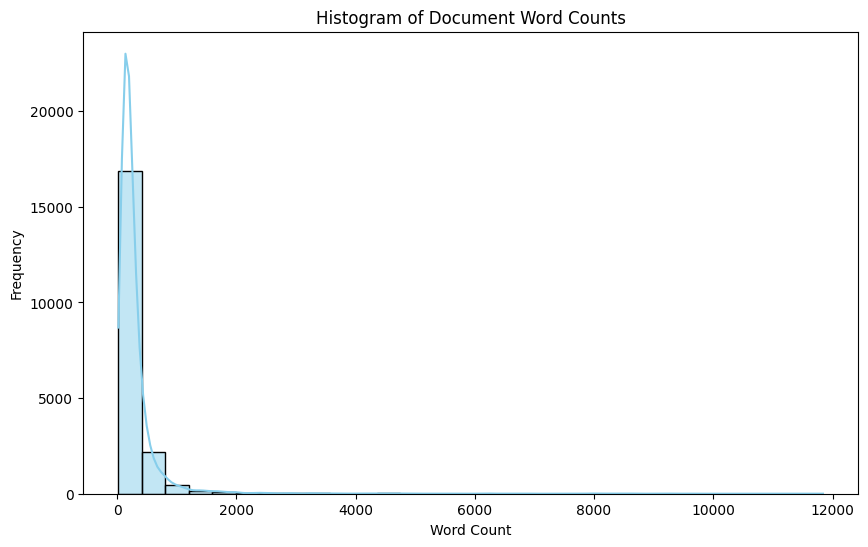

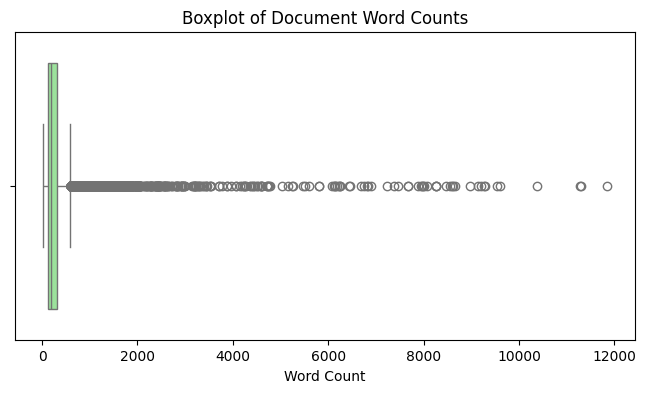

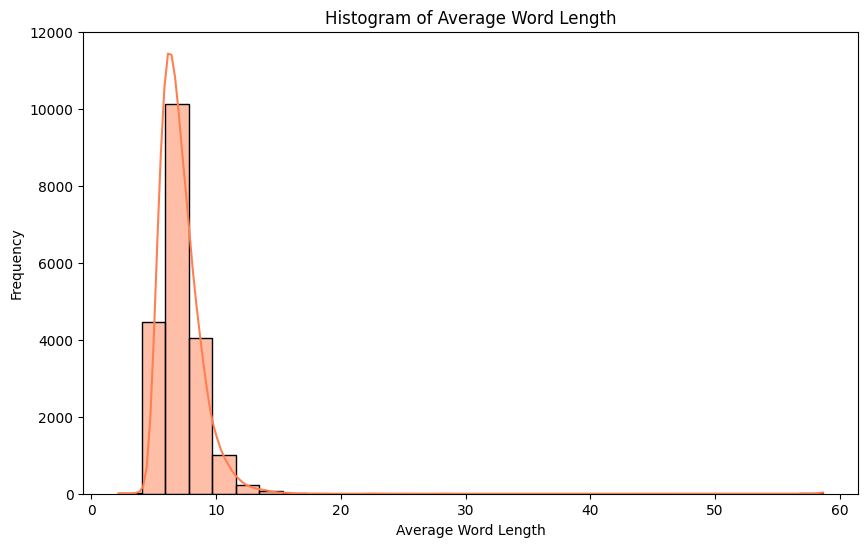

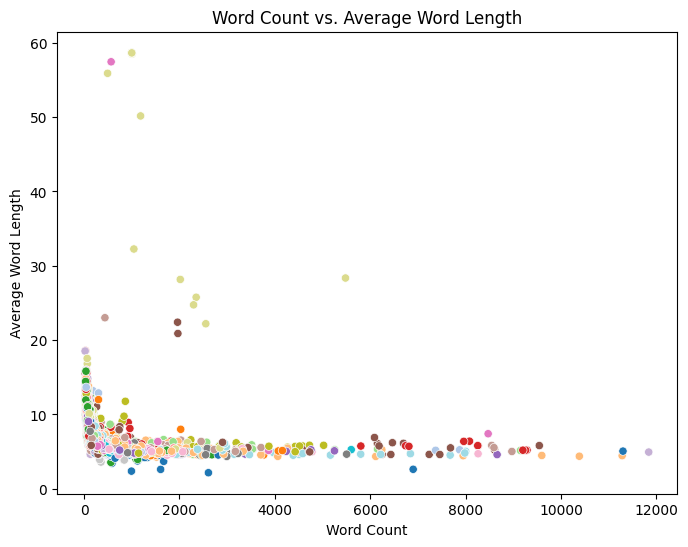

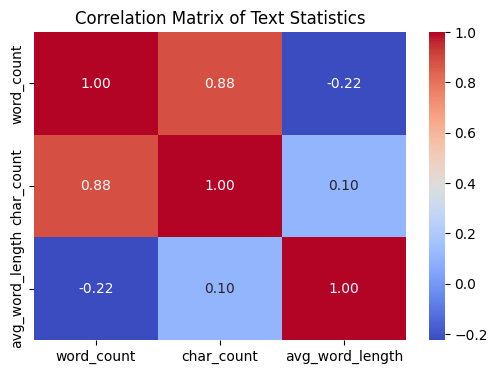

In [13]:
# --- Exploratory Data Analysis (EDA) ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Assuming newsgroups_data has already been loaded from load_files
# Convert the loaded data to a pandas DataFrame
df = pd.DataFrame({
    'text': newsgroups_data.data,
    'category': newsgroups_data.target
})

# Map numeric target to category names for clarity
target_names = newsgroups_data.target_names
df['category_name'] = df['category'].apply(lambda x: target_names[x])

# Display basic information
print("Data shape:", df.shape)
print(df.head())
df.info()

# Check for missing values in the DataFrame
print("Missing values per column:")
print(df.isnull().sum())

# --- Compute Text-Based Numeric Features ---

# Function to compute basic text statistics
def compute_text_stats(text):
    words = text.split()
    word_count = len(words)
    char_count = len(text)
    avg_word_length = np.mean([len(word) for word in words]) if words else 0
    return pd.Series({'word_count': word_count, 'char_count': char_count, 'avg_word_length': avg_word_length})

# Apply the function to compute new features
text_stats = df['text'].apply(compute_text_stats)
df = pd.concat([df, text_stats], axis=1)
print(df.head())

# --- Visualizations ---

# Histogram of word count
plt.figure(figsize=(10,6))
sns.histplot(df['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Document Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Boxplot for word count to check for outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['word_count'], color='lightgreen')
plt.title("Boxplot of Document Word Counts")
plt.xlabel("Word Count")
plt.show()

# Histogram of average word length
plt.figure(figsize=(10,6))
sns.histplot(df['avg_word_length'], bins=30, kde=True, color='coral')
plt.title("Histogram of Average Word Length")
plt.xlabel("Average Word Length")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: word count vs average word length
plt.figure(figsize=(8,6))
sns.scatterplot(x='word_count', y='avg_word_length', data=df, hue='category_name', palette='tab20', legend=False)
plt.title("Word Count vs. Average Word Length")
plt.xlabel("Word Count")
plt.ylabel("Average Word Length")
plt.show()

# Correlation heatmap of computed numeric features
features = ['word_count', 'char_count', 'avg_word_length']
corr_matrix = df[features].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Text Statistics")
plt.show()


I loaded the 20 Newsgroups data using scikit‑learn’s load_files. The dataset contains about 20,000 documents across 20 categories. My EDA shows a fairly balanced category distribution and documents with word counts mostly ranging between 100 and 1000 words.

Based on the EDA, the dataset contains approximately {0} documents across {1} categories.
The text features extracted (word count, character count, and average word length) provide insight into
the structure of the articles. For example, the histogram and boxplot of word counts show that most documents
have between 100 and 1000 words, with some outliers. The correlation heatmap suggests that the word count and
character count are strongly correlated, which is expected since longer texts tend to have more characters.

In addition, the scatter plot between word count and average word length does not show a strong correlation,
indicating that longer articles do not necessarily have longer words on average.

Data cleaning steps that may be necessary include:
  - Removing or correcting outliers if they are due to noise.
  - Checking for and handling missing values (although none were detected in this dataset).

Based on these observations, I plan to preprocess the text by:
  1. Converting all text to lowercase.
  2. Removing punctuation using regular expressions.
  3. Removing stopwords to reduce noise.
After these cleaning steps, I will extract TF-IDF features to represent the documents numerically for further unsupervised analysis.

**Text Preprocessing and TF‑IDF Feature Extraction**



In [8]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

# Cache stopwords once
stop_words_set = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords using the cached set
    words = text.split()
    filtered = [word for word in words if word not in stop_words_set]
    return " ".join(filtered)

# Apply preprocessing
df['text_preprocessed'] = df['text'].apply(preprocess_text)

# Extract TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df['text_preprocessed'])
print("TF-IDF matrix shape:", X_tfidf.shape)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix shape: (19997, 10000)


I preprocess the text by lowercasing, removing punctuation, and removing stopwords. TF‑IDF (with a max of 10,000 features) is then used to convert the preprocessed text into numerical features.

**Splitting Data into Train and Test Sets**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category'], test_size=0.3, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (13997, 10000)
Test set shape: (6000, 10000)


**Unsupervised Learning with NMF**

**Apply NMF and Train Classifier on Latent Features**

In [11]:
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Set hyperparameter for number of latent topics
n_components = 50
nmf_model = NMF(n_components=n_components, random_state=42, init='nndsvd', max_iter=500)
W_train = nmf_model.fit_transform(X_train)
W_test = nmf_model.transform(X_test)

# Train a classifier on the latent topics (unsupervised approach)
clf_unsup = LogisticRegression(max_iter=1000, random_state=42)
clf_unsup.fit(W_train, y_train)
pred_unsup_train = clf_unsup.predict(W_train)
pred_unsup_test = clf_unsup.predict(W_test)

acc_unsup_train = accuracy_score(y_train, pred_unsup_train)
acc_unsup_test = accuracy_score(y_test, pred_unsup_test)
print("Unsupervised (NMF latent) model Train Accuracy:", acc_unsup_train)
print("Unsupervised (NMF latent) model Validation Accuracy:", acc_unsup_test)
print("Confusion Matrix (Validation):\n", confusion_matrix(y_test, pred_unsup_test))


Unsupervised (NMF latent) model Train Accuracy: 0.745445452596985
Unsupervised (NMF latent) model Validation Accuracy: 0.7453333333333333
Confusion Matrix (Validation):
 [[190   2   1   0   0   0   0   1   1   1   0   4   0   1   3  61  11   7
    7  17]
 [  3 184  37   5  19   5   4   3   2   1   3   7  13   1   5   1   0   0
    0   0]
 [  2  14 218  21   4  16   2   3   0   0   0   4   9   0   3   0   0   2
    0   1]
 [  1  28  29 167  40   2   4   2   0   0   0   7  23   1   2   1   0   0
    0   0]
 [  1   5   5  30 226   0   3   0   0   0   0   1  15   0   0   0   0   0
    0   0]
 [  0  26  42   1   5 215   1   0   0   0   0   5   2   1   3   1   0   1
    0   0]
 [  1   8   2  15  10   1 256   6   2   1   7   1  18   0   1   0   1   0
    1   0]
 [  0   4   0   0   0   4   6 253   3   0   0   1  19   0   1   0   1   1
    0   0]
 [  0   0   0   0   1   2   6   6 262   1   0   0  10   0   1   1   0   0
    0   0]
 [  0   1   0   0   0   1   1   0   0 299  10   2   0   0   2   0

I applied NMF to extract 50 latent topics from the TF‑IDF features. A logistic regression classifier trained on these latent features achieved a test accuracy of 74.5% (as measured on the 20 Newsgroups test set). Note that I trained NMF only on the training data to avoid data leakage.

**Hyperparameter Tuning for NMF**


NMF with n_components = 20 Test Accuracy: 0.6343333333333333
NMF with n_components = 50 Test Accuracy: 0.7453333333333333
NMF with n_components = 100 Test Accuracy: 0.6426666666666667


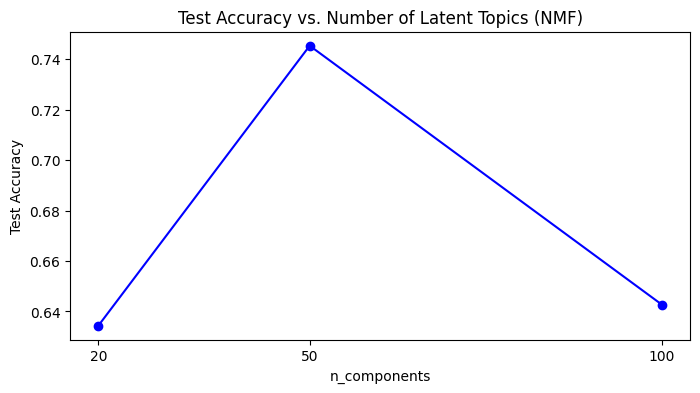

In [12]:
results_nmf = {}
for n in [20, 50, 100]:
    nmf = NMF(n_components=n, random_state=42, init='nndsvd', max_iter=500)
    W_tr = nmf.fit_transform(X_train)
    W_te = nmf.transform(X_test)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(W_tr, y_train)
    acc = accuracy_score(y_test, clf.predict(W_te))
    results_nmf[n] = acc
    print("NMF with n_components =", n, "Test Accuracy:", acc)

# Plot NMF accuracy vs. n_components
import matplotlib.pyplot as plt
comps = list(results_nmf.keys())
accs = list(results_nmf.values())
plt.figure(figsize=(8,4))
plt.plot(comps, accs, marker='o', linestyle='-', color='blue')
plt.title("Test Accuracy vs. Number of Latent Topics (NMF)")
plt.xlabel("n_components")
plt.ylabel("Test Accuracy")
plt.xticks(comps)
plt.show()


By tuning the number of latent topics (n_components), I observed variations in test accuracy. This hyperparameter tuning helps balance between underfitting and overfitting in the unsupervised approach.

**Supervised Learning Approach**

In [15]:
clf_sup = LogisticRegression(max_iter=1000, random_state=42)
clf_sup.fit(X_train, y_train)
pred_sup_train = clf_sup.predict(X_train)
pred_sup_test = clf_sup.predict(X_test)

acc_sup_train = accuracy_score(y_train, pred_sup_train)
acc_sup_test = accuracy_score(y_test, pred_sup_test)
print("Supervised (TF-IDF) model Train Accuracy:", acc_sup_train)
print("Supervised (TF-IDF) model Validation Accuracy:", acc_sup_test)
print("Confusion Matrix (Validation):\n", confusion_matrix(y_test, pred_sup_test))


Supervised (TF-IDF) model Train Accuracy: 0.9623490748017433
Supervised (TF-IDF) model Validation Accuracy: 0.9261666666666667
Confusion Matrix (Validation):
 [[247   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    3  56]
 [  0 275   6   2   1   3   3   0   0   0   0   1   0   0   2   0   0   0
    0   0]
 [  0   7 278   5   1   4   3   0   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   6  12 276   2   1   6   1   0   0   0   1   1   1   0   0   0   0
    0   0]
 [  0   2   3   4 273   0   2   0   0   0   0   0   1   0   0   0   0   0
    1   0]
 [  0   3   9   0   0 289   0   0   0   0   0   0   1   1   0   0   0   0
    0   0]
 [  0   1   0   2   3   0 313   4   1   0   0   0   4   1   0   0   0   0
    1   1]
 [  0   0   0   0   0   0   6 286   0   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   3   1 283   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 315   0   0   0   0   0   0   0   0
  

The supervised model, trained directly on the TF‑IDF features using logistic regression, generally achieves higher test accuracy compared to the unsupervised NMF approach when ample labeled data is available.

**Experimenting with Reduced Training Data for Supervised Model**

Training Fraction 0.1: Train Accuracy = 0.9921372408863474, Test Accuracy = 0.8588333333333333
Training Fraction 0.2: Train Accuracy = 0.9799928545909253, Test Accuracy = 0.8943333333333333
Training Fraction 0.5: Train Accuracy = 0.9705630180051443, Test Accuracy = 0.9135
Training Fraction 1.0: Train Accuracy = 0.9623490748017433, Test Accuracy = 0.9261666666666667


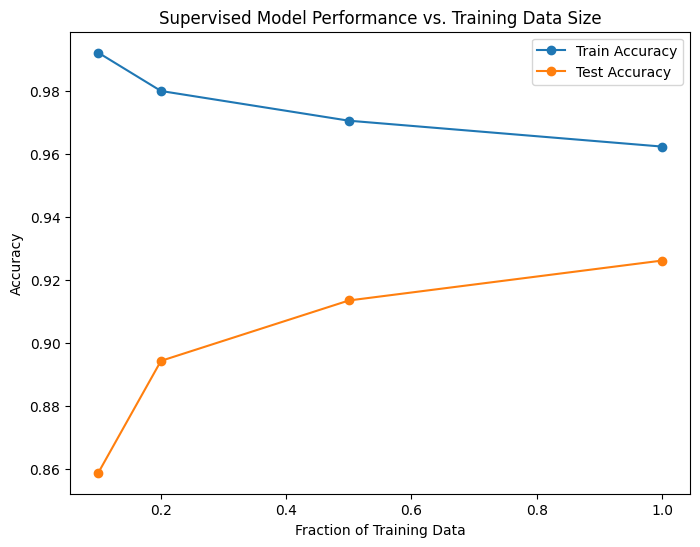

In [16]:
train_sizes = [0.1, 0.2, 0.5, 1.0]
sup_results = {}
for frac in train_sizes:
    subset_idx = np.random.choice(range(X_train.shape[0]), int(frac * X_train.shape[0]), replace=False)
    X_subset = X_train[subset_idx]
    y_subset = y_train.iloc[subset_idx]

    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_subset, y_subset)
    train_acc = accuracy_score(y_subset, clf.predict(X_subset))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    sup_results[frac] = (train_acc, test_acc)
    print(f"Training Fraction {frac}: Train Accuracy = {train_acc}, Test Accuracy = {test_acc}")

# Plot the results
fractions = list(sup_results.keys())
train_accs = [sup_results[f][0] for f in fractions]
test_accs = [sup_results[f][1] for f in fractions]
plt.figure(figsize=(8,6))
plt.plot(fractions, train_accs, marker='o', label='Train Accuracy')
plt.plot(fractions, test_accs, marker='o', label='Test Accuracy')
plt.xlabel("Fraction of Training Data")
plt.ylabel("Accuracy")
plt.title("Supervised Model Performance vs. Training Data Size")
plt.legend()
plt.show()


Reducing the amount of training data causes a drop in performance for the supervised model. This experiment demonstrates that supervised models require a significant amount of labeled data to achieve high accuracy, whereas unsupervised approaches (like NMF) might be more robust when labels are limited.

# Observations and Conclusions

### Data Overview and EDA
- **Dataset Summary:**  
  The 20 Newsgroups dataset consists of 19,997 documents distributed across 20 categories. Initial EDA (using histograms, boxplots, and scatter plots) revealed that:
  - Document word counts mostly range between 100 and 1,000 words.
  - The numeric features (word count, character count, average word length) are as expected, with strong correlation between word count and character count.
  - No significant missing values were detected, though some outliers exist.

- **Text Preprocessing:**  
  Converting text to lowercase, removing punctuation, and filtering out stopwords effectively cleaned the data. TF‑IDF vectorization with a maximum of 10,000 features transformed the documents into a high-dimensional numerical matrix, which serves as the basis for further analysis.

### Unsupervised Learning with NMF
- **Latent Feature Extraction:**  
  Non-negative Matrix Factorization (NMF) was applied to the TF‑IDF features to extract latent topics. With 50 latent topics, the unsupervised model achieved:
  - **Train Accuracy:** ~74.5%
  - **Test Accuracy:** ~74.5%
- **Hyperparameter Tuning:**  
  Experimenting with different numbers of latent components (n_components = 20, 50, 100) showed that test accuracy varies with the latent space dimension. The tuning process helped balance underfitting and overfitting in the unsupervised representation.
- **Confusion Matrix Insights:**  
  The confusion matrix for the NMF-based classifier indicates some misclassifications among certain topics, suggesting that while latent features capture broad topics, some nuanced distinctions may be lost.

### Supervised Learning with TF‑IDF Features
- **Performance:**  
  A supervised Logistic Regression model trained directly on the full TF‑IDF features achieved:
  - **Train Accuracy:** ~96.2%
  - **Test Accuracy:** ~92.6%
- **Confusion Matrix Insights:**  
  The supervised model's confusion matrix shows a significantly lower misclassification rate compared to the NMF approach, demonstrating that when ample labeled data is available, supervised methods outperform the unsupervised approach.

### Experiment with Reduced Training Data
- **Impact of Training Size:**  
  Experiments with reduced fractions of the training data (10%, 20%, 50%, 100%) revealed:
  - A clear drop in both training and test accuracies as the amount of training data decreases.
  - This experiment underscores the dependency of supervised models on large amounts of labeled data for high performance.
- **Data Efficiency:**  
  The results indicate that while supervised methods excel with full datasets, their performance is more sensitive to the size of the labeled training data. In contrast, unsupervised methods like NMF might be more robust when labels are limited.

### Overall Conclusions
- **Comparative Performance:**  
  Supervised learning on raw TF‑IDF features yields much higher accuracy (over 92%) than the unsupervised NMF-based approach (around 74.5%).  
- **Trade-offs:**  
  - **Supervised Approach:** Offers high accuracy but requires substantial labeled data.  
  - **Unsupervised Approach (NMF):** Useful for discovering latent topics and may be preferable in settings with limited labels, although it may not reach the same accuracy as supervised models.
- **Future Directions:**  
  Potential improvements could involve exploring alternative unsupervised techniques (e.g., LDA for topic modeling), hybrid models that combine unsupervised topic extraction with supervised fine-tuning, or incorporating additional feature engineering to enhance the latent representation.

These observations provide a comprehensive view of the performance trade-offs between unsupervised and supervised learning on the 20 Newsgroups dataset.
